In [186]:
library(ggplot2)
library(gridExtra)
library(scales)
library(comprehenr)
library(dplyr)
library(stringr)

## Exercise 1 - Community Mobility Open Data

The data show how visitors to (or time spent in) categorized places change compared to
baseline days. A baseline day represents a normal value for that day of the week. The
baseline day is the median value from the 5-week period Jan 3 – Feb 6, 2020.
To make the reports useful, categories have been used to group some of the places with
similar characteristics for purposes of social distancing guidance. The following categories
are available:
- retail and recreation, i.e. places like restaurants,cafes, shopping centers, theme parks,museums,
libraries, and movie theaters
- grocery and pharmacy, i.e. grocery markets, food warehouses, farmers markets, specialty
food shops, drug stores, and pharmacies
- parks, i.e. national parks, public beaches, marinas, dog parks, plazas,and public gardens
- transit stations i.e. all public transport hubs such as subway, bus, and train stations
- workplaces, i.e. places of work
- residential, i.e. people’s residence

In [8]:
# Select a couple of European countries of your choice and analyze the trends in the previous variables over time
it_20_df = read.csv("Region_Mobility_Report_CSVs/2020_IT_Region_Mobility_Report.csv")
gb_20_df = read.csv("Region_Mobility_Report_CSVs/2020_GB_Region_Mobility_Report.csv")
ne_20_df = read.csv("Region_Mobility_Report_CSVs/2020_NE_Region_Mobility_Report.csv")

In [58]:
# create week and month column
it_20_df$week = lubridate::week(it_20_df$date)
it_20_df$month = lubridate::month(it_20_df$date)

gb_20_df$week = lubridate::week(gb_20_df$date)
gb_20_df$month = lubridate::month(gb_20_df$date)

ne_20_df$week = lubridate::week(ne_20_df$date)
ne_20_df$month = lubridate::month(ne_20_df$date)

In [13]:
attributes(it_20_df)

$names
 [1] "country_region_code"                               
 [2] "country_region"                                    
 [3] "sub_region_1"                                      
 [4] "sub_region_2"                                      
 [5] "metro_area"                                        
 [6] "iso_3166_2_code"                                   
 [7] "census_fips_code"                                  
 [8] "place_id"                                          
 [9] "date"                                              
[10] "retail_and_recreation_percent_change_from_baseline"
[11] "grocery_and_pharmacy_percent_change_from_baseline" 
[12] "parks_percent_change_from_baseline"                
[13] "transit_stations_percent_change_from_baseline"     
[14] "workplaces_percent_change_from_baseline"           
[15] "residential_percent_change_from_baseline"          
[16] "week"                                              
[17] "month"                                             

$row.names
    [1]     1     2     3     4     5     6     7     8     9    10    11    12
   [13]    13    14    15    16    17    18    19    20    21    22    23    24
   [25]    25    26    27    28    29    30    31    32    33    34    35    36
   [37]    37    38    39    40    41    42    43    44    45    46    47    48
   [49]    49    50    51    52    53    54    55    56    57    58    59    60
   [61]    61    62    63    64    65    66    67    68    69    70    71    72
   [73]    73    74    75    76    77    78    79    80    81    82    83    84
   [85]    85    86    87    88    89    90    91    92    93    94    95    96
   [97]    97    98    99   100   101   102   103   104   105   106   107   108
  [109]   109   110   111   112   113   114   115   116   117   118   119   120
  [121]   121   122   123   124   125   126   127   128   129   130   131   132
  [133]   133   134   135   136   137   138   139   140   141   142   143   144
  [145]   145   146   147   148   149   150   151   152   153   154   155   156
  [157]   157   158   159   160   161   162   163   164   165   166   167   168
  [169]   169   170   171   172   173   174   175   176   177   178   179   180
  [181]   181   182   183   184   185   186   187   188   189   190   191   192
  [193]   193   194   195   196   197   198   199   200   201   202   203   204
  [205]   205   206   207   208   209   210   211   212   213   214   215   216
  [217]   217   218   219   220   221   222   223   224   225   226   227   228
  [229]   229   230   231   232   233   234   235   236   237   238   239   240
  [241]   241   242   243   244   245   246   247   248   249   250   251   252
  [253]   253   254   255   256   257   258   259   260   261   262   263   264
  [265]   265   266   267   268   269   270   271   272   273   274   275   276
  [277]   277   278   279   280   281   282   283   284   285   286   287   288
  [289]   289   290   291   292   293   294   295   296   297   298   299   300
  [301]   301   302   303   304   305   306   307   308   309   310   311   312
  [313]   313   314   315   316   317   318   319   320   321   322   323   324
  [325]   325   326   327   328   329   330   331   332   333   334   335   336
  [337]   337   338   339   340   341   342   343   344   345   346   347   348
  [349]   349   350   351   352   353   354   355   356   357   358   359   360
  [361]   361   362   363   364   365   366   367   368   369   370   371   372
  [373]   373   374   375   376   377   378   379   380   381   382   383   384
  [385]   385   386   387   388   389   390   391   392   393   394   395   396
  [397]   397   398   399   400   401   402   403   404   405   406   407   408
  [409]   409   410   411   412   413   414   415   416   417   418   419   420
  [421]   421   422   423   424   425   426   427   428   429   430   431   432
  [433]   433   434   435   436   437   438   439   440   441   442   443   444
  [445]   445   446   447   448   4

In [51]:
# grouping by weeks
it_20_df_week = it_20_df %>%  group_by(week) %>% summarise(rr = mean(retail_and_recreation_percent_change_from_baseline, na.rm=TRUE),
                                                           gp = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=TRUE),
                                                           pa = mean(parks_percent_change_from_baseline, na.rm=TRUE),
                                                           ts = mean(transit_stations_percent_change_from_baseline, na.rm=TRUE),
                                                           wp = mean(workplaces_percent_change_from_baseline, na.rm=TRUE),
                                                           re = mean(residential_percent_change_from_baseline, na.rm=TRUE))
                                                           
gb_20_df_week = gb_20_df %>%  group_by(week) %>% summarise(rr = mean(retail_and_recreation_percent_change_from_baseline, na.rm=TRUE),
                                                           gp = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=TRUE),
                                                           pa = mean(parks_percent_change_from_baseline, na.rm=TRUE),
                                                           ts = mean(transit_stations_percent_change_from_baseline, na.rm=TRUE),
                                                           wp = mean(workplaces_percent_change_from_baseline, na.rm=TRUE),
                                                           re = mean(residential_percent_change_from_baseline, na.rm=TRUE))

ne_20_df_week = ne_20_df %>%  group_by(week) %>% summarise(rr = mean(retail_and_recreation_percent_change_from_baseline, na.rm=TRUE),
                                                           gp = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=TRUE),
                                                           pa = mean(parks_percent_change_from_baseline, na.rm=TRUE),
                                                           ts = mean(transit_stations_percent_change_from_baseline, na.rm=TRUE),
                                                           wp = mean(workplaces_percent_change_from_baseline, na.rm=TRUE),
                                                           re = mean(residential_percent_change_from_baseline, na.rm=TRUE))

summary_20_df_week = data.frame(
    week = c(it_20_df_week$week, gb_20_df_week$week, ne_20_df_week$week),
    rr = c(it_20_df_week$rr, gb_20_df_week$rr, ne_20_df_week$rr),
    gp = c(it_20_df_week$gp, gb_20_df_week$gp, ne_20_df_week$gp),
    pa = c(it_20_df_week$pa, gb_20_df_week$pa, ne_20_df_week$pa),
    ts = c(it_20_df_week$ts, gb_20_df_week$ts, ne_20_df_week$ts),
    wp = c(it_20_df_week$wp, gb_20_df_week$wp, ne_20_df_week$wp),
    re = c(it_20_df_week$re, gb_20_df_week$re, ne_20_df_week$re),
    country = c(rep("IT", length(it_20_df_week$week)), rep("GB", length(gb_20_df_week$week)), rep("NE", length(ne_20_df_week$week)))
)

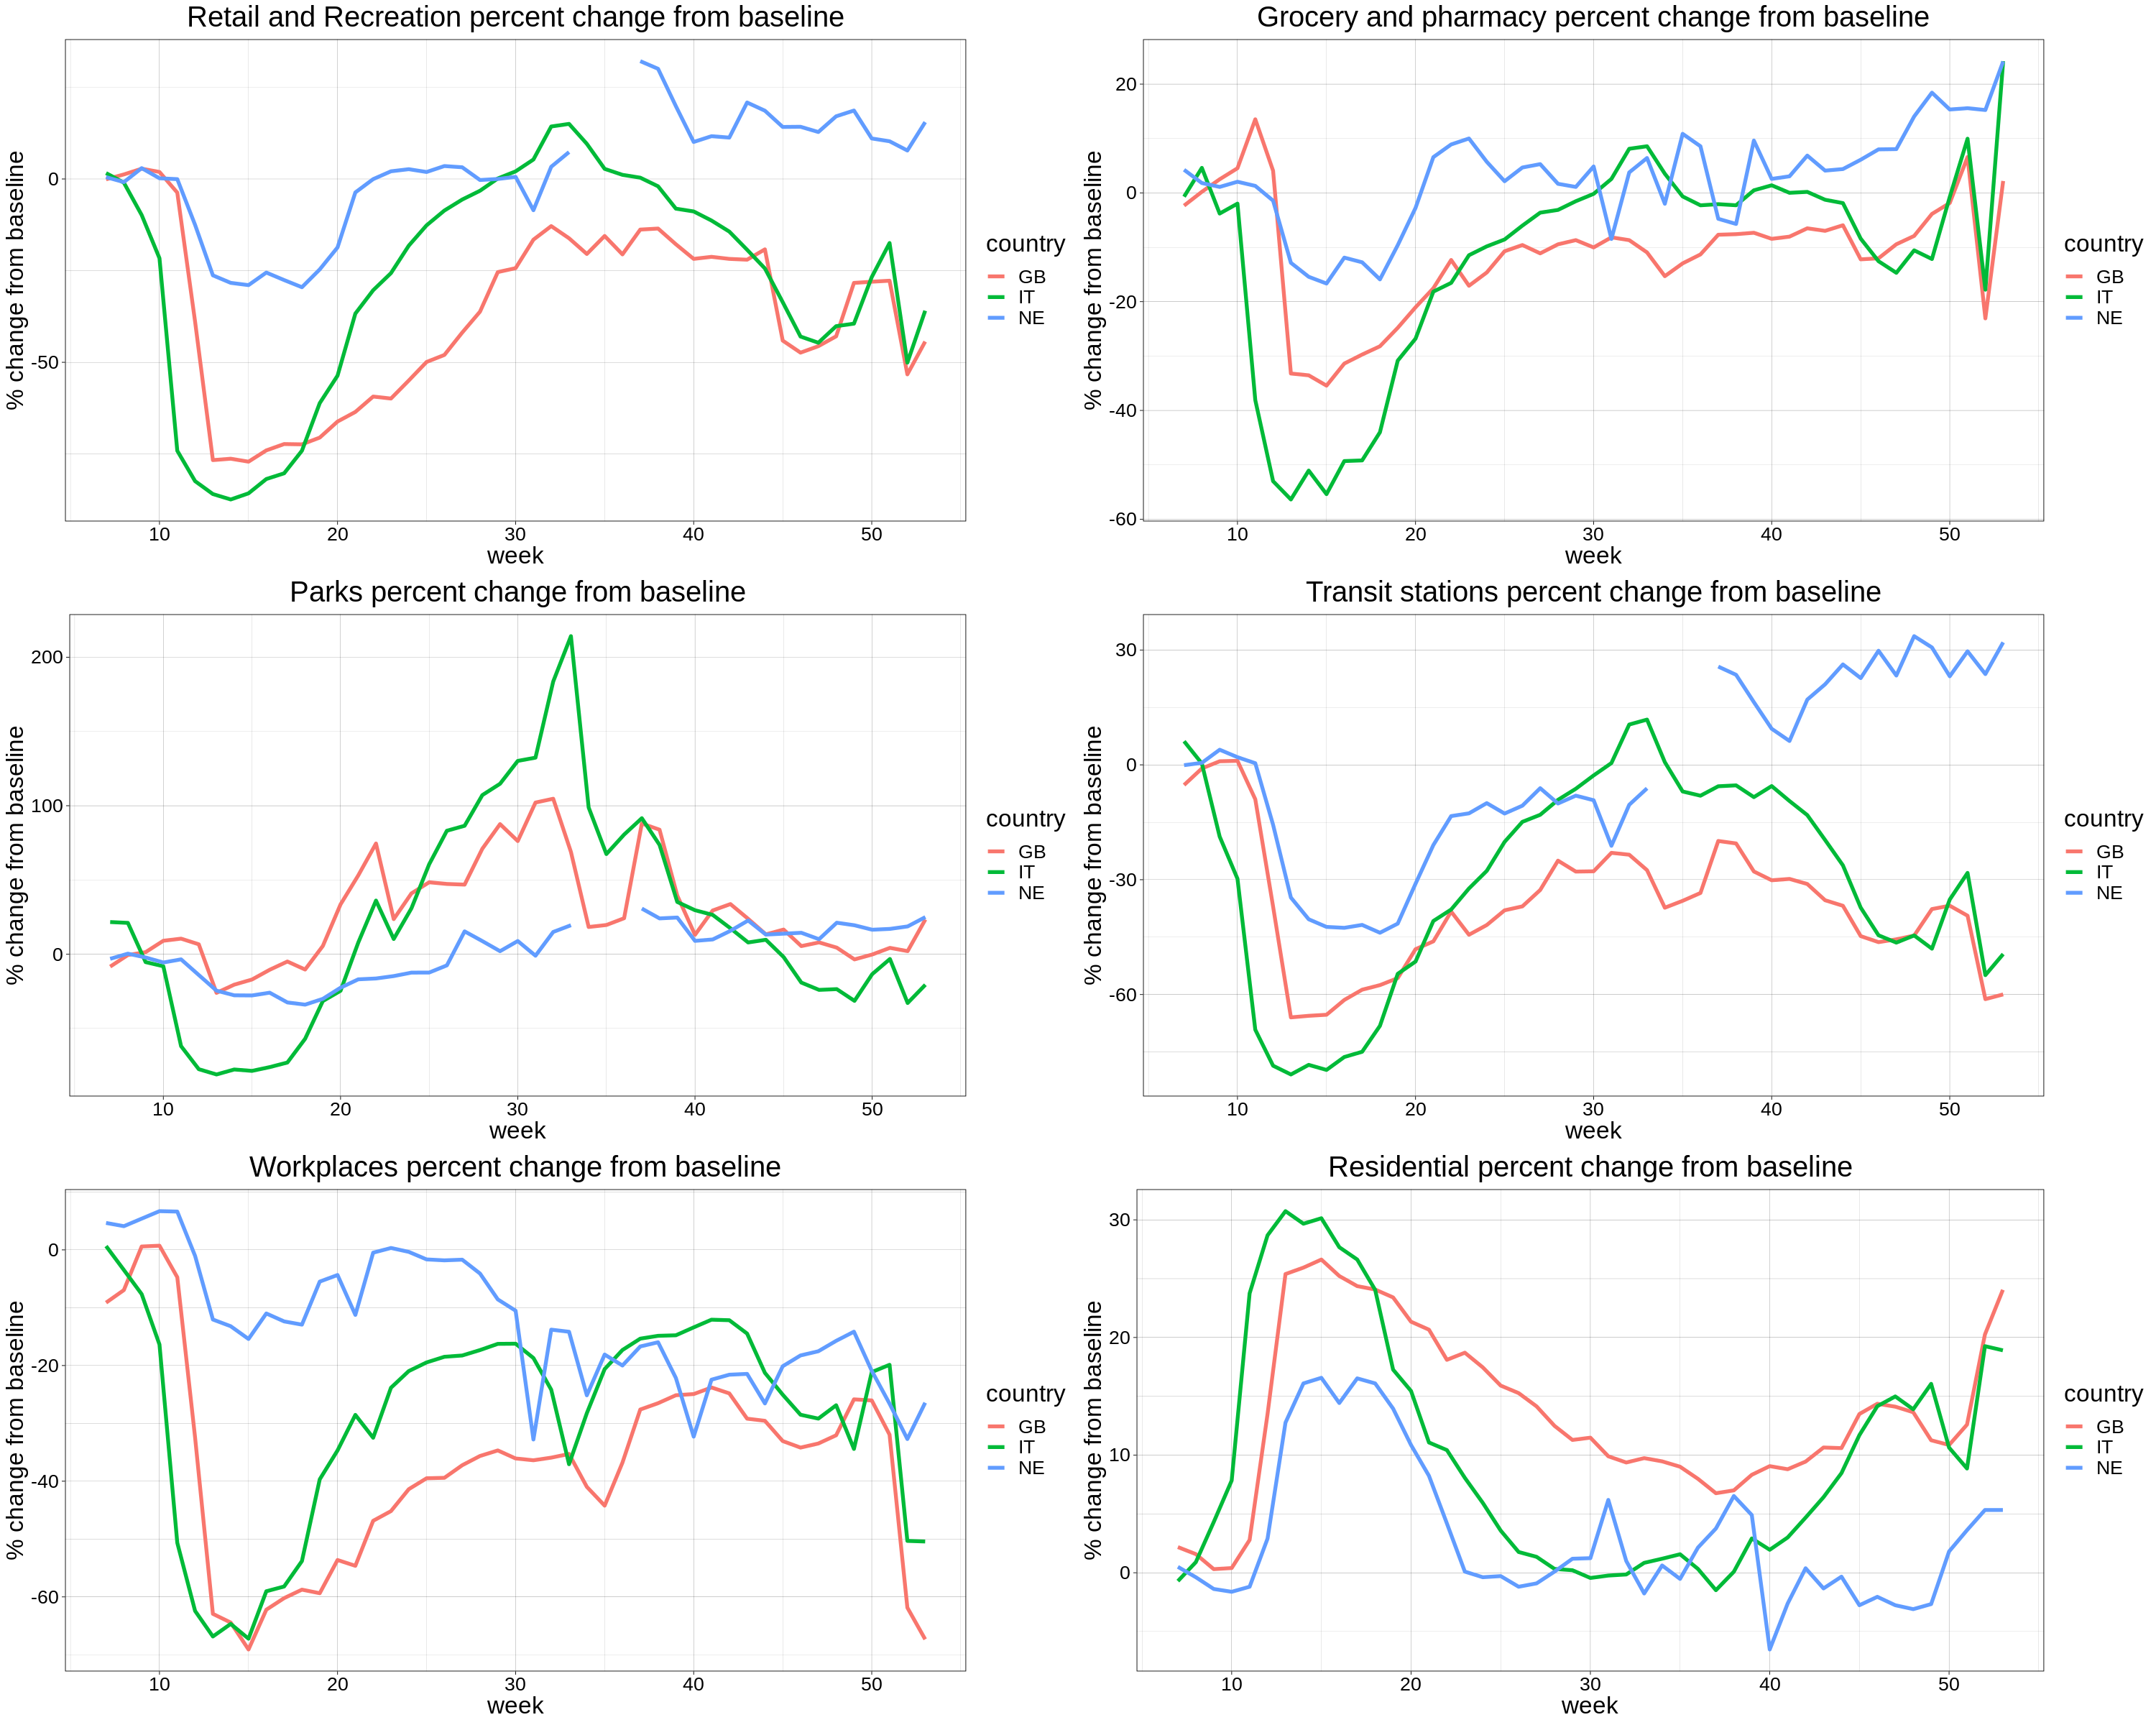

In [55]:
options(repr.plot.width=25, repr.plot.height=20)                                     
plot_rr <- ggplot(data=summary_20_df_week, aes(x=week, y=rr)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Retail and Recreation percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5))     

plot_gp <- ggplot(data=summary_20_df_week, aes(x=week, y=gp)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Grocery and pharmacy percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5))

plot_pa <- ggplot(data=summary_20_df_week, aes(x=week, y=pa)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Parks percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5)) 

plot_ts <- ggplot(data=summary_20_df_week, aes(x=week, y=ts)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Transit stations percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5))  

plot_wp <- ggplot(data=summary_20_df_week, aes(x=week, y=wp)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Workplaces percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5))  

plot_re <- ggplot(data=summary_20_df_week, aes(x=week, y=re)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Residential percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5))       

grid.arrange(plot_rr,
             plot_gp,
             plot_pa,
             plot_ts,
             plot_wp,
             plot_re, 
             ncol=)              



In [61]:
# grouping by months
it_20_df_month = it_20_df %>%  group_by(month) %>% summarise(rr = mean(retail_and_recreation_percent_change_from_baseline, na.rm=TRUE),
                                                           gp = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=TRUE),
                                                           pa = mean(parks_percent_change_from_baseline, na.rm=TRUE),
                                                           ts = mean(transit_stations_percent_change_from_baseline, na.rm=TRUE),
                                                           wp = mean(workplaces_percent_change_from_baseline, na.rm=TRUE),
                                                           re = mean(residential_percent_change_from_baseline, na.rm=TRUE))
                                                           
gb_20_df_month = gb_20_df %>%  group_by(month) %>% summarise(rr = mean(retail_and_recreation_percent_change_from_baseline, na.rm=TRUE),
                                                           gp = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=TRUE),
                                                           pa = mean(parks_percent_change_from_baseline, na.rm=TRUE),
                                                           ts = mean(transit_stations_percent_change_from_baseline, na.rm=TRUE),
                                                           wp = mean(workplaces_percent_change_from_baseline, na.rm=TRUE),
                                                           re = mean(residential_percent_change_from_baseline, na.rm=TRUE))

ne_20_df_month = ne_20_df %>%  group_by(month) %>% summarise(rr = mean(retail_and_recreation_percent_change_from_baseline, na.rm=TRUE),
                                                           gp = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=TRUE),
                                                           pa = mean(parks_percent_change_from_baseline, na.rm=TRUE),
                                                           ts = mean(transit_stations_percent_change_from_baseline, na.rm=TRUE),
                                                           wp = mean(workplaces_percent_change_from_baseline, na.rm=TRUE),
                                                           re = mean(residential_percent_change_from_baseline, na.rm=TRUE))

summary_20_df_month = data.frame(
    month = c(it_20_df_month$month, gb_20_df_month$month, ne_20_df_month$month),
    rr = c(it_20_df_month$rr, gb_20_df_month$rr, ne_20_df_month$rr),
    gp = c(it_20_df_month$gp, gb_20_df_month$gp, ne_20_df_month$gp),
    pa = c(it_20_df_month$pa, gb_20_df_month$pa, ne_20_df_month$pa),
    ts = c(it_20_df_month$ts, gb_20_df_month$ts, ne_20_df_month$ts),
    wp = c(it_20_df_month$wp, gb_20_df_month$wp, ne_20_df_month$wp),
    re = c(it_20_df_month$re, gb_20_df_month$re, ne_20_df_month$re),
    country = c(rep("IT", length(it_20_df_month$month)), rep("GB", length(gb_20_df_month$month)), rep("NE", length(ne_20_df_month$month)))
)

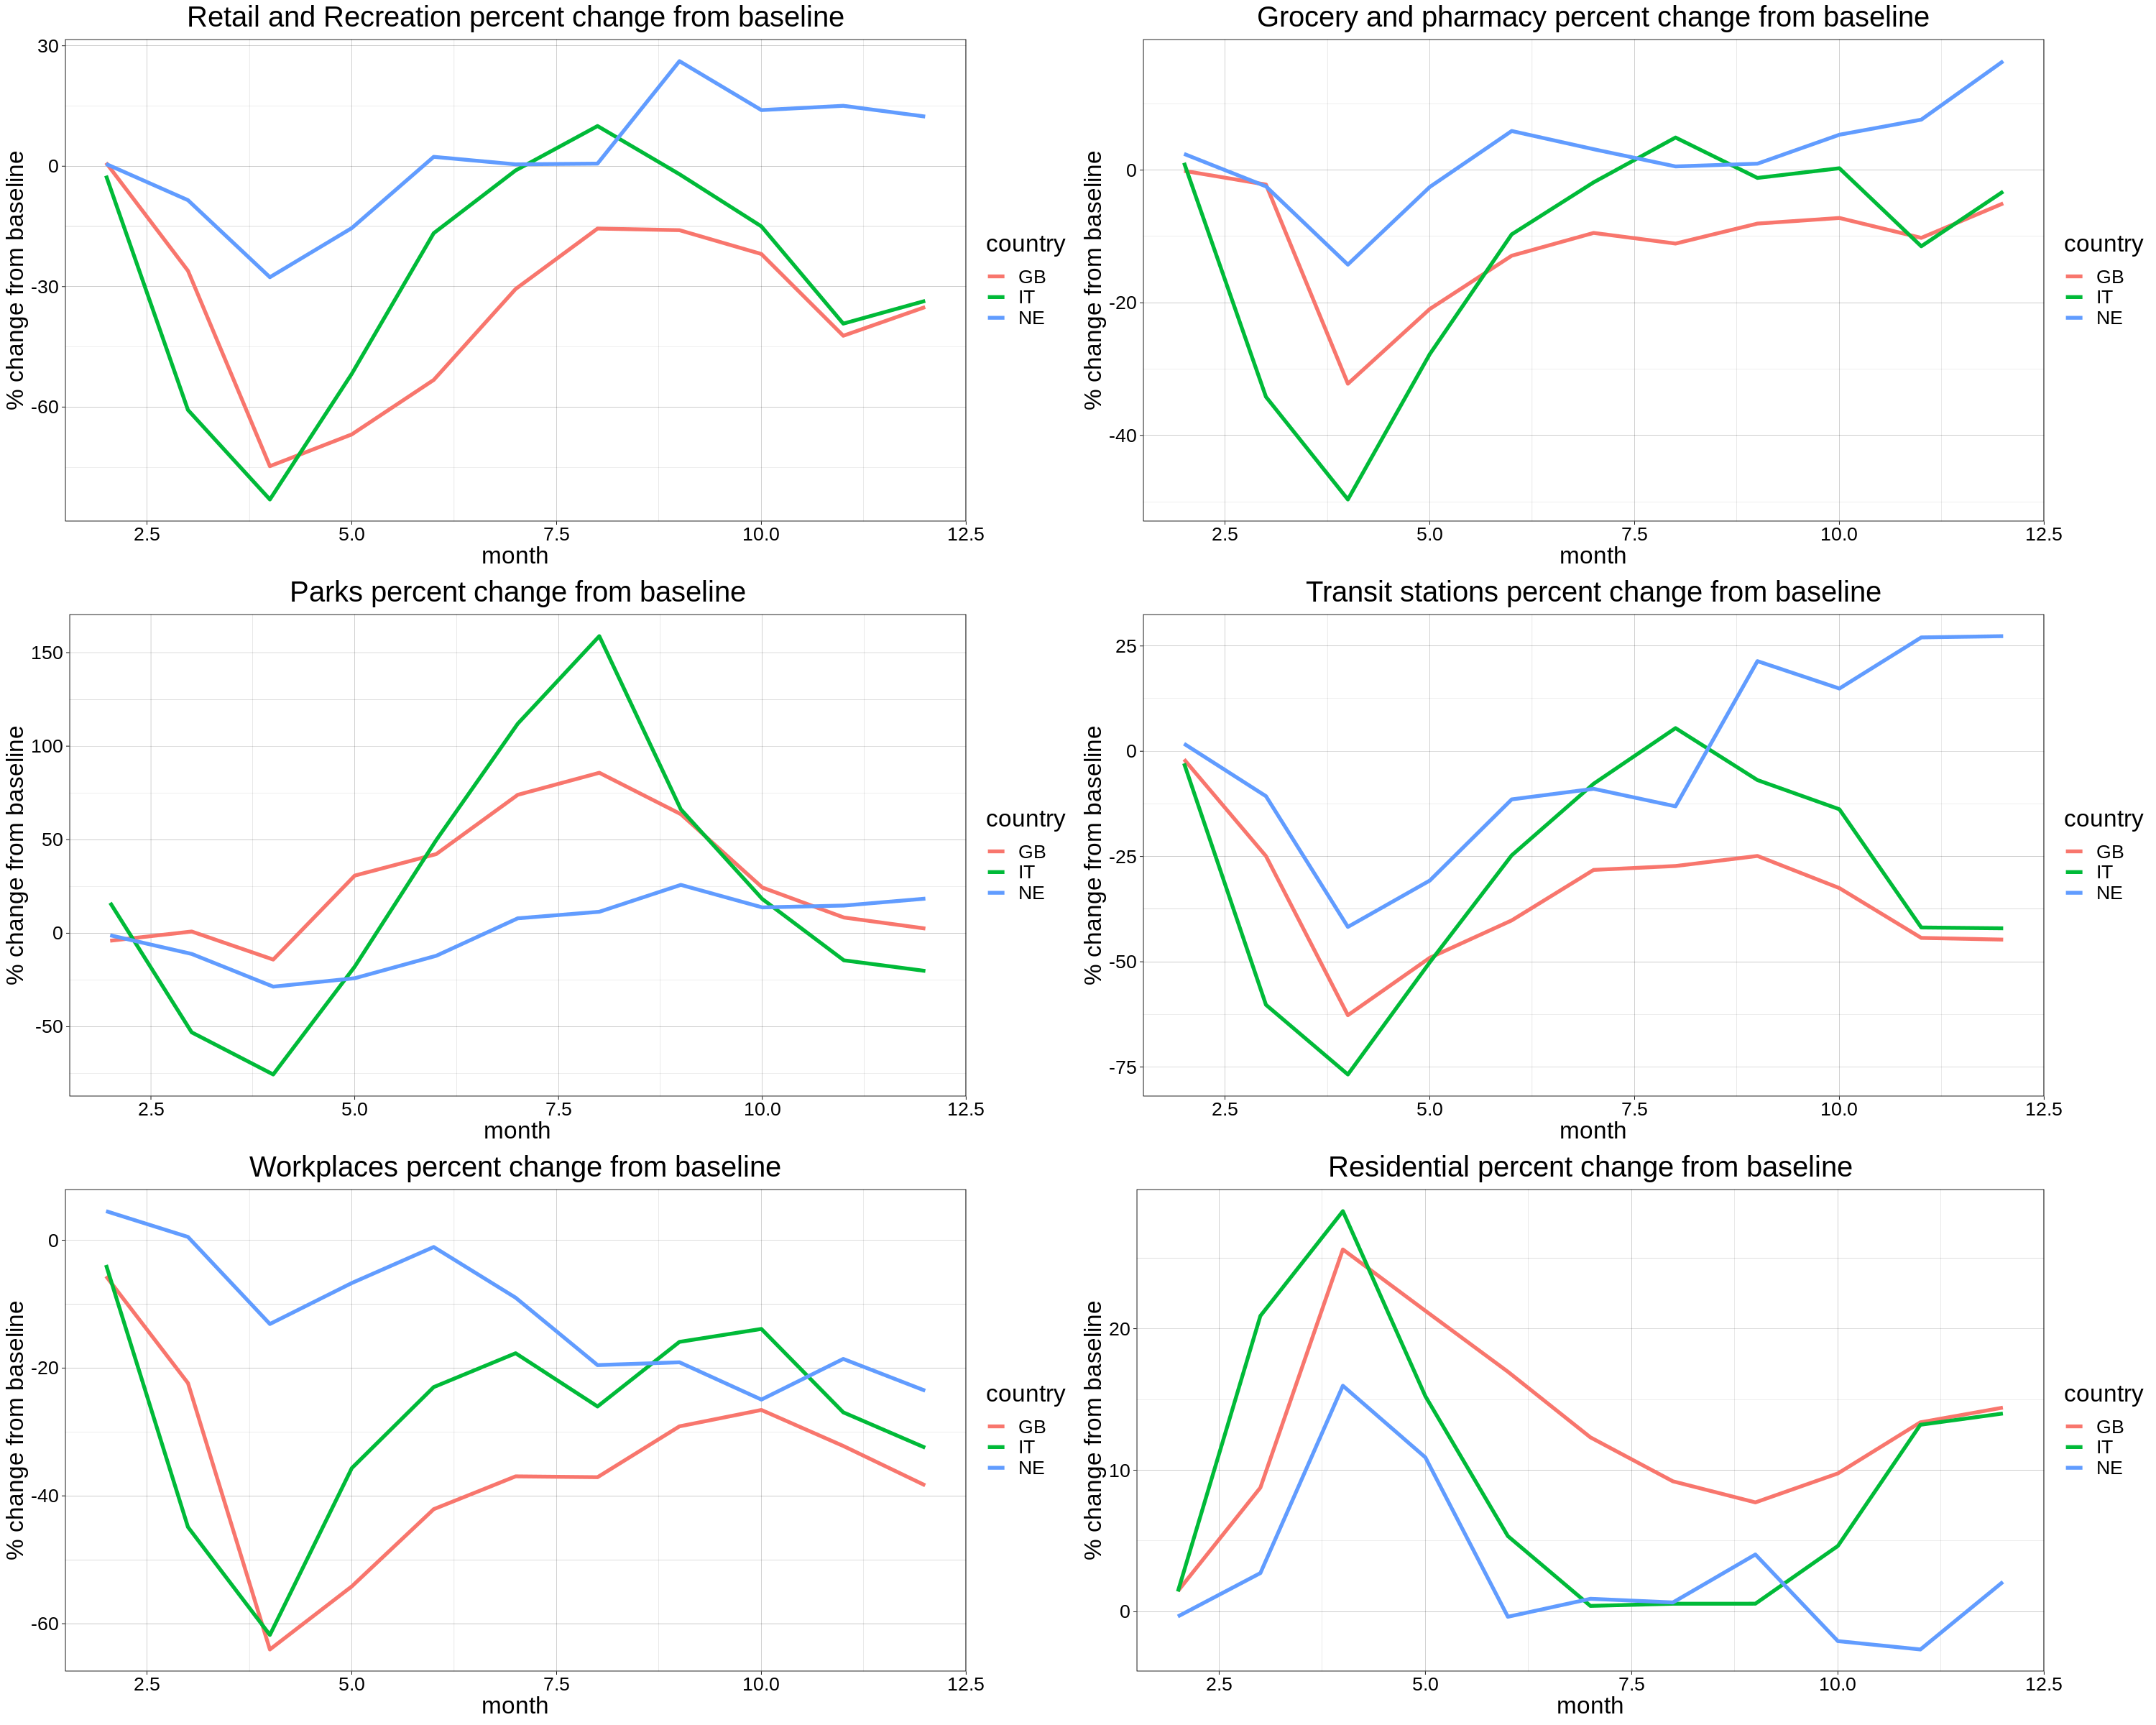

In [62]:
options(repr.plot.width=25, repr.plot.height=20)                                     
plot_rr <- ggplot(data=summary_20_df_month, aes(x=month, y=rr)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Retail and Recreation percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5))     

plot_gp <- ggplot(data=summary_20_df_month, aes(x=month, y=gp)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Grocery and pharmacy percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5))

plot_pa <- ggplot(data=summary_20_df_month, aes(x=month, y=pa)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Parks percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5)) 

plot_ts <- ggplot(data=summary_20_df_month, aes(x=month, y=ts)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Transit stations percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5))  

plot_wp <- ggplot(data=summary_20_df_month, aes(x=month, y=wp)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Workplaces percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5))  

plot_re <- ggplot(data=summary_20_df_month, aes(x=month, y=re)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=country), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ylab("% change from baseline") +
     ggtitle("Residential percent change from baseline") +
     theme(plot.title = element_text(hjust = 0.5))       

grid.arrange(plot_rr,
             plot_gp,
             plot_pa,
             plot_ts,
             plot_wp,
             plot_re, 
             ncol=)  

## Exercise 2 - Random number generators

- one of the first random number generator was proposed by von Neumann, the so-called
middle square algorithm
- write R code to implement this type of generator and, given a fixed digit number input,
square it an remove the leading and trailing digits, in order to return a number with the
same number of digits as the original number

_*Suggestion* : after having squared the number, convert it to a list of characters
(number <- unlist(strsplit(as.character(x.squared),"")))
and, after having removed the head and tail of the list, convert it back to a number
(as.numeric(paste(number.after.trimming, collapse="")))_


In [150]:
trim = function(x){
    # convert x and squared x to list
    x_list  = unlist(strsplit(as.character(format(x, scientific=FALSE)),""))
    x2_list = unlist(strsplit(as.character(format(x^2, scientific=FALSE)),""))
    
    # trim x2_list
    l_x  = length(x_list)
    l_x2 = length(x2_list)
    t = (l_x2-l_x)%/%2
    if (t==0){
        stop("Error: x must be a number with a high number of digits")
    }
    x2_trimmed  = x2_list[-c(1:t, (t+l_x+1):l_x2)]

    return (as.numeric(paste(x2_trimmed, collapse="")))
}

middle_square = function(x, n){
    ####### MIDDLE SQUARE ALGO ##########
    
             #-------------#
             # Description #
             #-------------#

    # Generate a random number of k digits
    # in n iterations given number of k
    # digits

             #-------------#
             #  Arguments  #
             #-------------#
    
    # - x : input number of k digits
    # - n : number of iterations

    # compute k
    k = length(unlist(strsplit(as.character(format(x, scientific=FALSE)),"")))

    for( i in 1:n){
        # take into account the case in which the most significant digit is 0
        x = trim(x)
        if (length(unlist(strsplit(as.character(format(x, scientific=FALSE)),"")))<k){
            x = x*10
        }
    }

    return (x)

}

middle_square(125547887, 26)

[1] 338500211

## Exercise 3 - Bayesian Inference
A publishing company has recently launched a new journal. In order to determine
how effective it is in reaching its possible audience, a market survey company selects a
random sample of people from a possible target audience and interviews them. Out of
150 interviewed people, 29 have read the last issue of the journal.

a) What kind of distribution would you assume for y, the number of people that have seen
the last issue of the journal ?

b) Assuming a uniform prior, what is the posterior distribution for y ?

c) Plot both posterior and likelihood distributions functions

-> _Solution_

a) I would assume a __binomial__ distribution for y. We have a probability $p$ that one have read the journal and $1-p$ in the opposite case, considering $n$ people is just as 
looking for $k$ successes in $n$ Bernoulli trials. So we can assume a likelihood:
$$
 P(y|p, n, M) = \binom{n}{y} p ^y (1-p)^{n-y}
$$

b) If we adopt a uniform posterior $U(0,1)$ the posterior would be proportional to the likelihood previously reported:
$$
 P(p|y, n, M) = \frac{P(y|p, n, M)}{Z}
$$
where normalization factor $Z$ is the evidence.

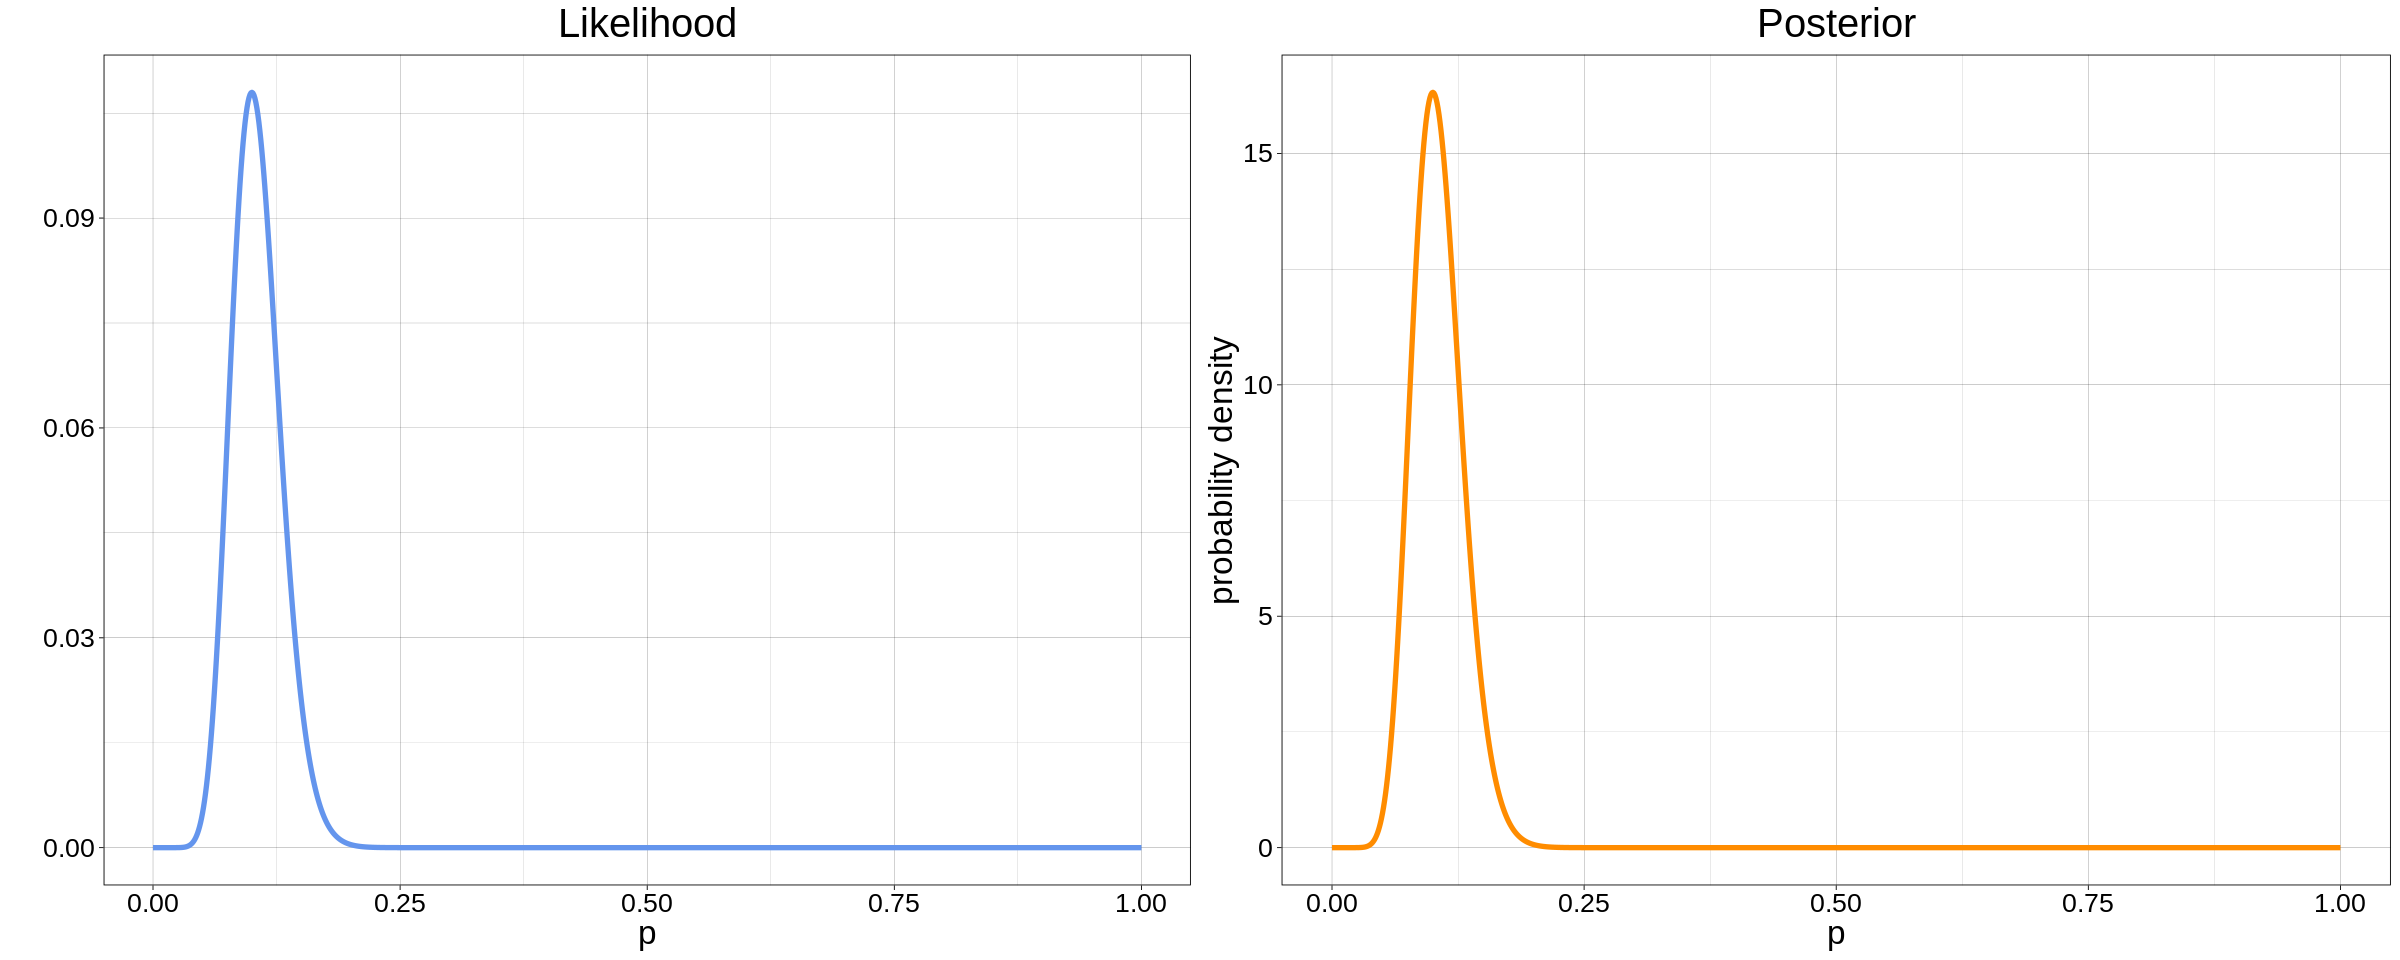

In [206]:
# c) plot both posterior and likelihood distribution functions

n = 150
y = 29

# likelihood 
likelihood = dbinom(r, n, p)

# posterior
n_points = 1000
p = seq(0, 1, length.out = n_points)

# to be normalized
posterior_  = likelihood*1
# normalized
posterior   = posterior_/sum(posterior_/n_points)

options(repr.plot.width=20, repr.plot.height=8)            

plot_likelihood <- ggplot() +   
     theme_linedraw() +                                            
     geom_line(aes(x=p, y=likelihood), color="cornflowerblue", lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("Likelihood") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("") +
     xlab("p")  

plot_posterior <- ggplot() +   
     theme_linedraw() +                                            
     geom_line(aes(x=p, y=posterior), color="darkorange", lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("Posterior") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("probability density") +
     xlab("p")  

grid.arrange(plot_likelihood, plot_posterior, ncol=2)


## Exercise 4 - Bayesian Inference
A coin is flipped n = 30 times with the following outcomes:
$$
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H,
T, H, H, H
$$

a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions
for the data set.

b) Evaluate the most probable value for the coin probability p and, integrating the posterior
probability distribution, give an estimate for a 95% credibility interval.

c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most
probable value and the credibility interval change as a function of the number of coin
tosses (i.e. from 1 to 30).

d) Do you get a different result, by analyzing the data sequentially with respect to a one-step
analysis (i.e. considering all the data as a whole) ?


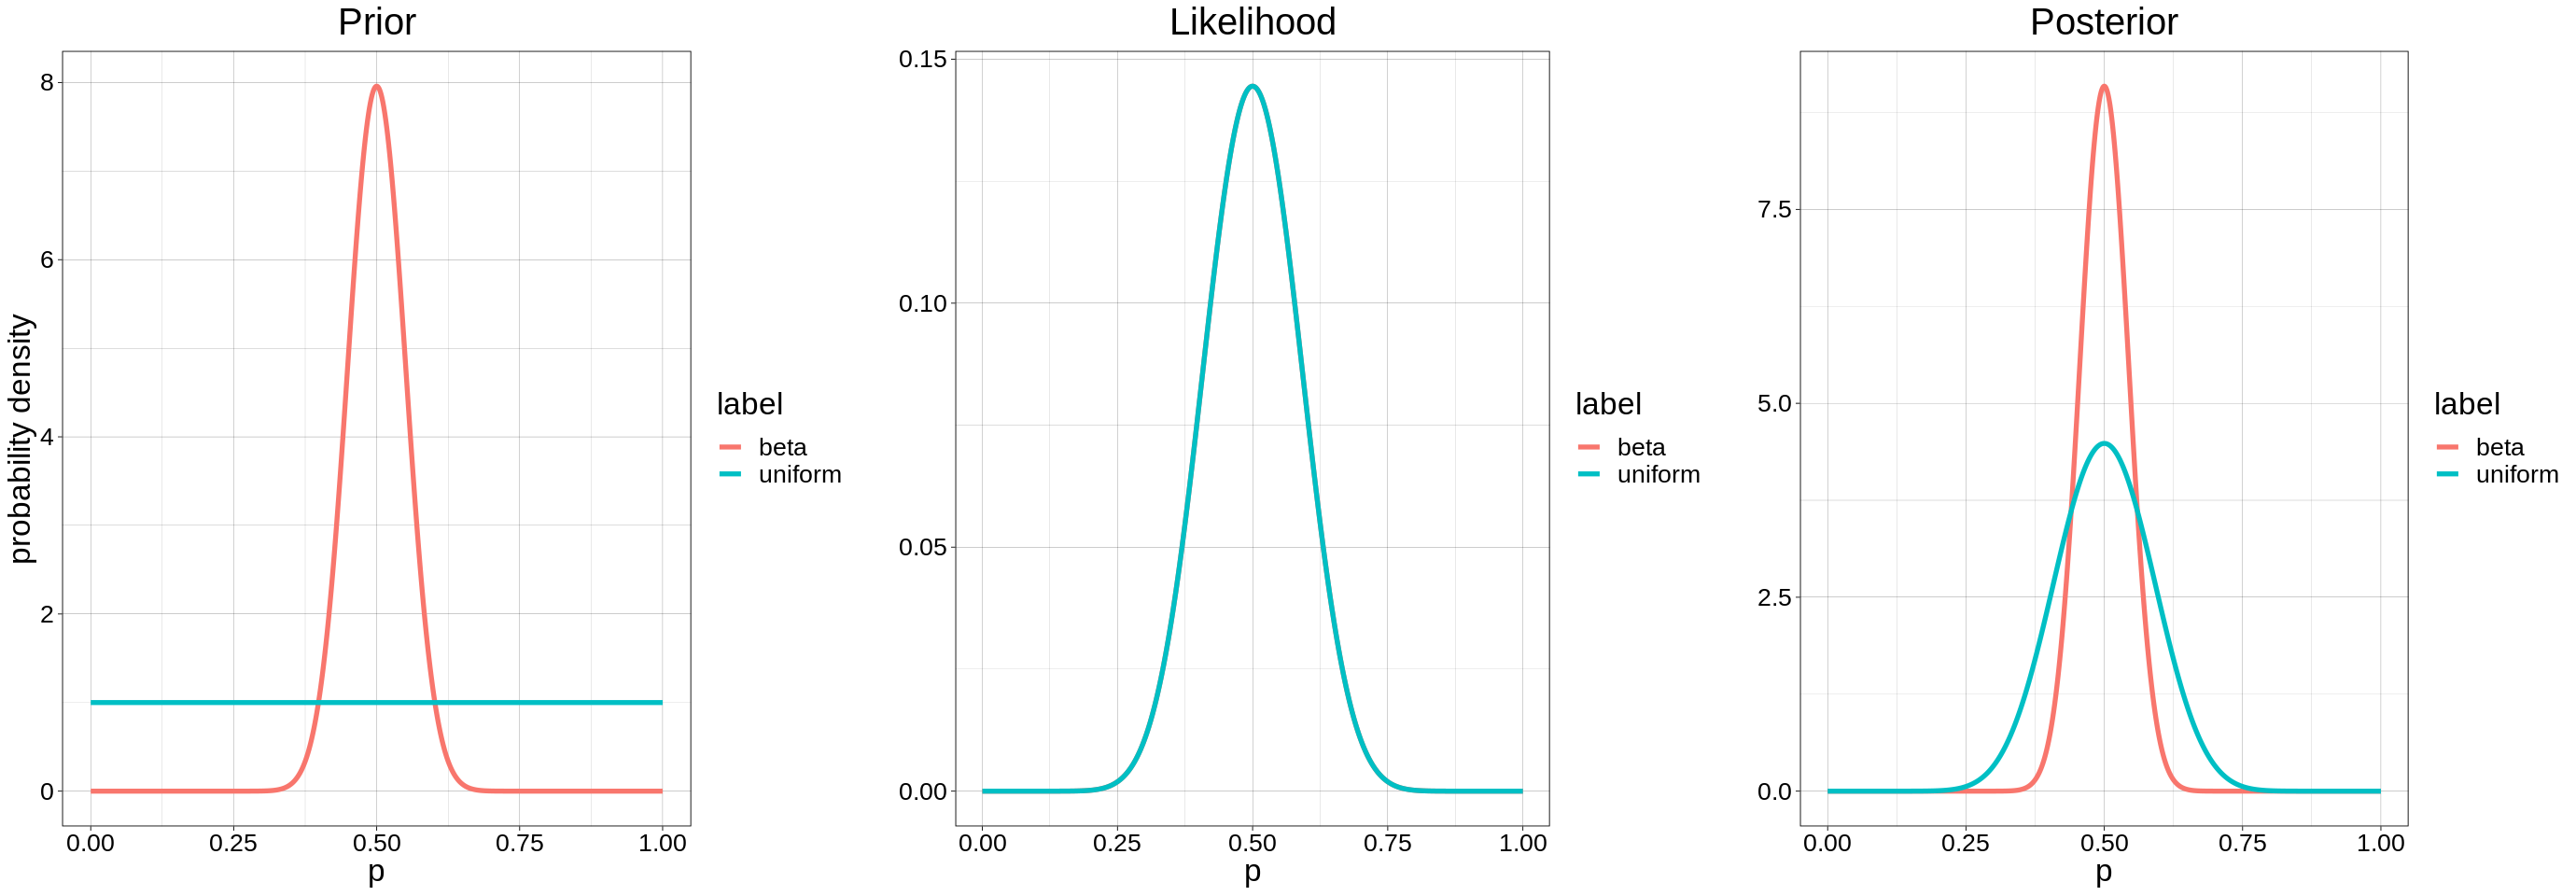

In [282]:
outcomes = c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')

r = sum(str_count(outcomes, 'H'))
n = length(outcomes)

n_points = 1000
p  = seq(0, 1, length.out=n_points)

# uniform and beta prior, alpha & beta based on personal hypotesis
alpha = 50
beta  = 50

unif_prior = rep(1, n_points)
beta_prior = dbeta(p, alpha, beta)

# likelihood is the same
likelihood = dbinom(r, n, p)

# posterior for the two cases (unif, beta)
unif_posterior_  = likelihood*1
unif_posterior   = unif_posterior_/sum(unif_posterior_/n_points)

beta_posterior_ = likelihood*beta_prior
beta_posterior  = beta_posterior_/sum(beta_posterior_/n_points)

df = data.frame(
    x          = c(p, p),
    prior      = c(unif_prior, beta_prior),
    likelihood = c(likelihood, likelihood),
    posterior  = c(unif_posterior, beta_posterior),
    label      = c(rep("uniform", n_points), rep("beta", n_points))
)
options(repr.plot.width=23, repr.plot.height=8)  
plot_prior <- ggplot(data=df, aes(x=x, y=prior)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=label), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("Prior") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("probability density") +
     xlab("p") 

plot_likelihood <- ggplot(data=df, aes(x=x, y=likelihood)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=label), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("Likelihood") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("") +
     xlab("p")

plot_posterior <- ggplot(data=df, aes(x=x, y=posterior)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=label), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("Posterior") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("") +
     xlab("p")

grid.arrange(plot_prior, plot_likelihood, plot_posterior, ncol=3)

In [283]:
unif_max_p = p[which.max(unif_posterior)]
beta_max_p = p[which.max(beta_posterior)]

cat("The most probable value for the coin probability p is:\n")
cat("\t", unif_max_p, "with the uniform prior \n")
cat("\t", beta_max_p, "with the beta prior \n")

unif_low  = p[cumsum(unif_posterior/n_points)>0.025][1]
unif_high = p[cumsum(unif_posterior/n_points)>0.975][1]
beta_low  = p[cumsum(beta_posterior/n_points)>0.025][1]
beta_high = p[cumsum(beta_posterior/n_points)>0.975][1]

cat("Bounds for a 95% credibility interval:\n")
cat("\t low:", unif_low, "high:", unif_high,"with the uniform prior \n")
cat("\t low:", beta_low, "high:", beta_high,"with the beta prior \n")

The most probable value for the coin probability p is:
	 0.4994995 with the uniform prior 
	 0.4994995 with the beta prior 
Bounds for a 95% credibility interval:
	 low: 0.3303303 high: 0.6696697 with the uniform prior 
	 low: 0.4144144 high: 0.5855856 with the beta prior 


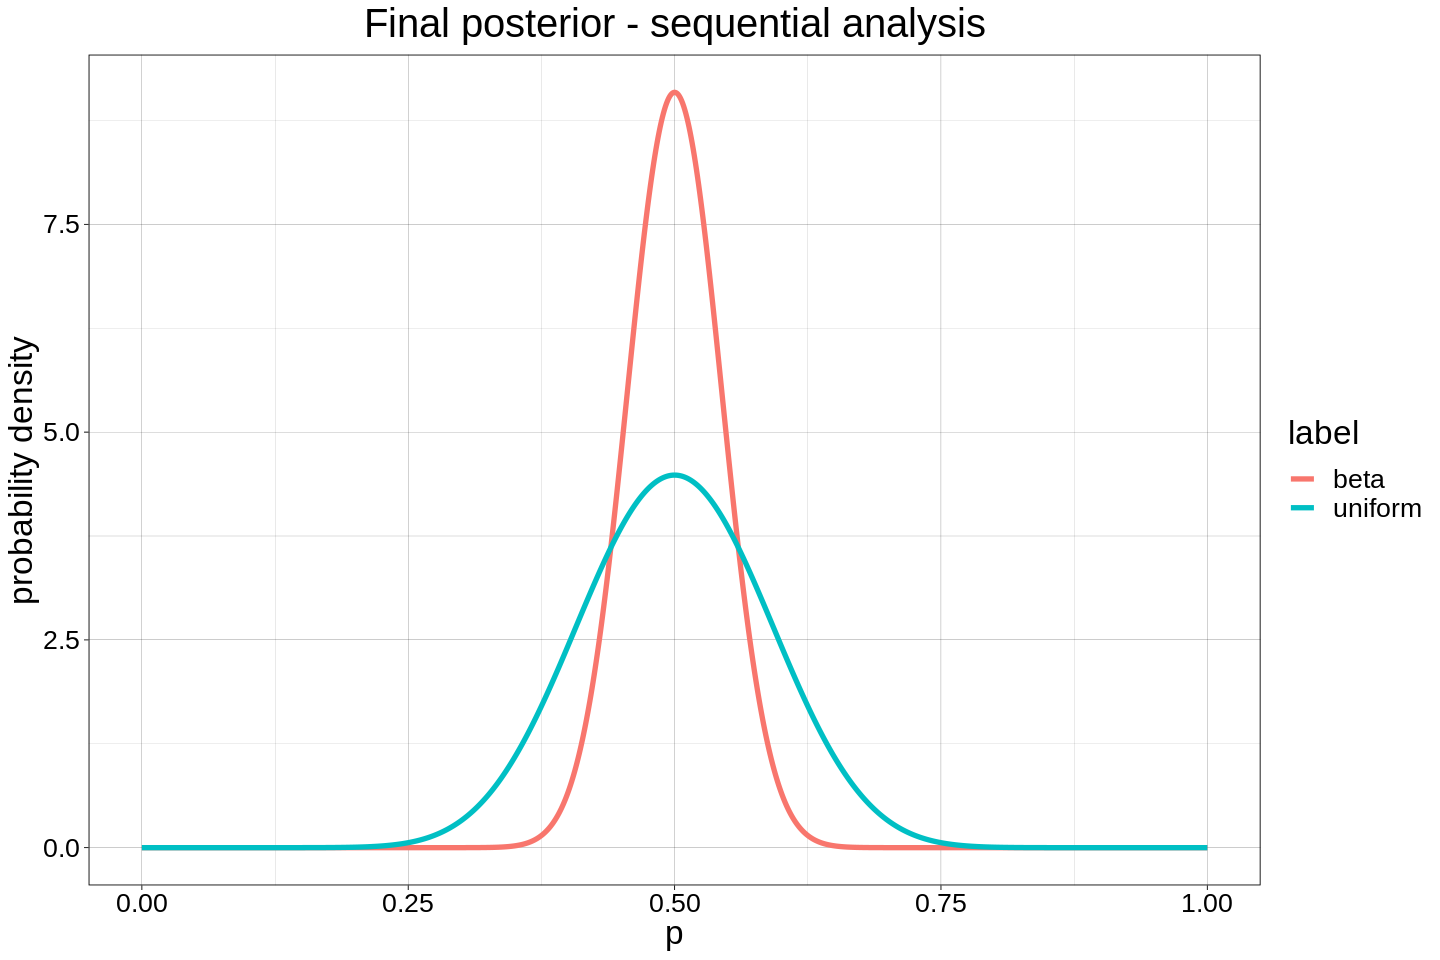

In [357]:
# same analysis but sequentially
n_points = 1000
p  = seq(0, 1, length.out=n_points)

# uniform and beta prior, alpha & beta based on personal hypotesis
alpha = 50
beta  = 50

unif_prior = rep(1, n_points)
beta_prior = dbeta(p, alpha, beta)

n_ = 1

unif_max_p = c()
beta_max_p = c()
unif_low   = c()
unif_high  = c()
beta_low   = c()
beta_high  = c()


for(i in 1:n){
    r = sum(str_count(outcomes[i], 'H'))

    # likelihood is the same
    likelihood = dbinom(r, n_, p)

    # posterior for the two cases (unif, beta)
    unif_posterior_  = likelihood*unif_prior
    unif_posterior   = unif_posterior_/sum(unif_posterior_/n_points)

    beta_posterior_ = likelihood*beta_prior
    beta_posterior  = beta_posterior_/sum(beta_posterior_/n_points)

    # concatenate results
    unif_max_p = c(unif_max_p, p[which.max(unif_posterior)])
    beta_max_p = c(beta_max_p, p[which.max(beta_posterior)])
    unif_low   = c(unif_low,  p[cumsum(unif_posterior/n_points)>0.025][1])
    unif_high  = c(unif_high, p[cumsum(unif_posterior/n_points)>0.975][1])
    beta_low   = c(beta_low,  p[cumsum(beta_posterior/n_points)>0.025][1])
    beta_high  = c(beta_high, p[cumsum(beta_posterior/n_points)>0.975][1])

    # update priors
    unif_prior = unif_posterior
    beta_prior = beta_posterior
}

df = data.frame(
    x          = c(p, p),
    posterior  = c(unif_posterior, beta_posterior),
    label      = c(rep("uniform", n_points), rep("beta", n_points))
)
options(repr.plot.width=12, repr.plot.height=8)  

plot_posterior <- ggplot(data=df, aes(x=x, y=posterior)) +   
     theme_linedraw() +                                            
     geom_line(aes(color=label), lwd=1.5) +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("Final posterior - sequential analysis") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("probability density") +
     xlab("p")

plot_posterior

In [358]:
df = data.frame(
    x = rep(1:n, 2),
    y = c(unif_max_p, beta_max_p),
    y_max = c(unif_high, beta_high),
    y_min = c(unif_low, beta_low),
    label = c(rep("uniform", n), rep("beta", n))
)

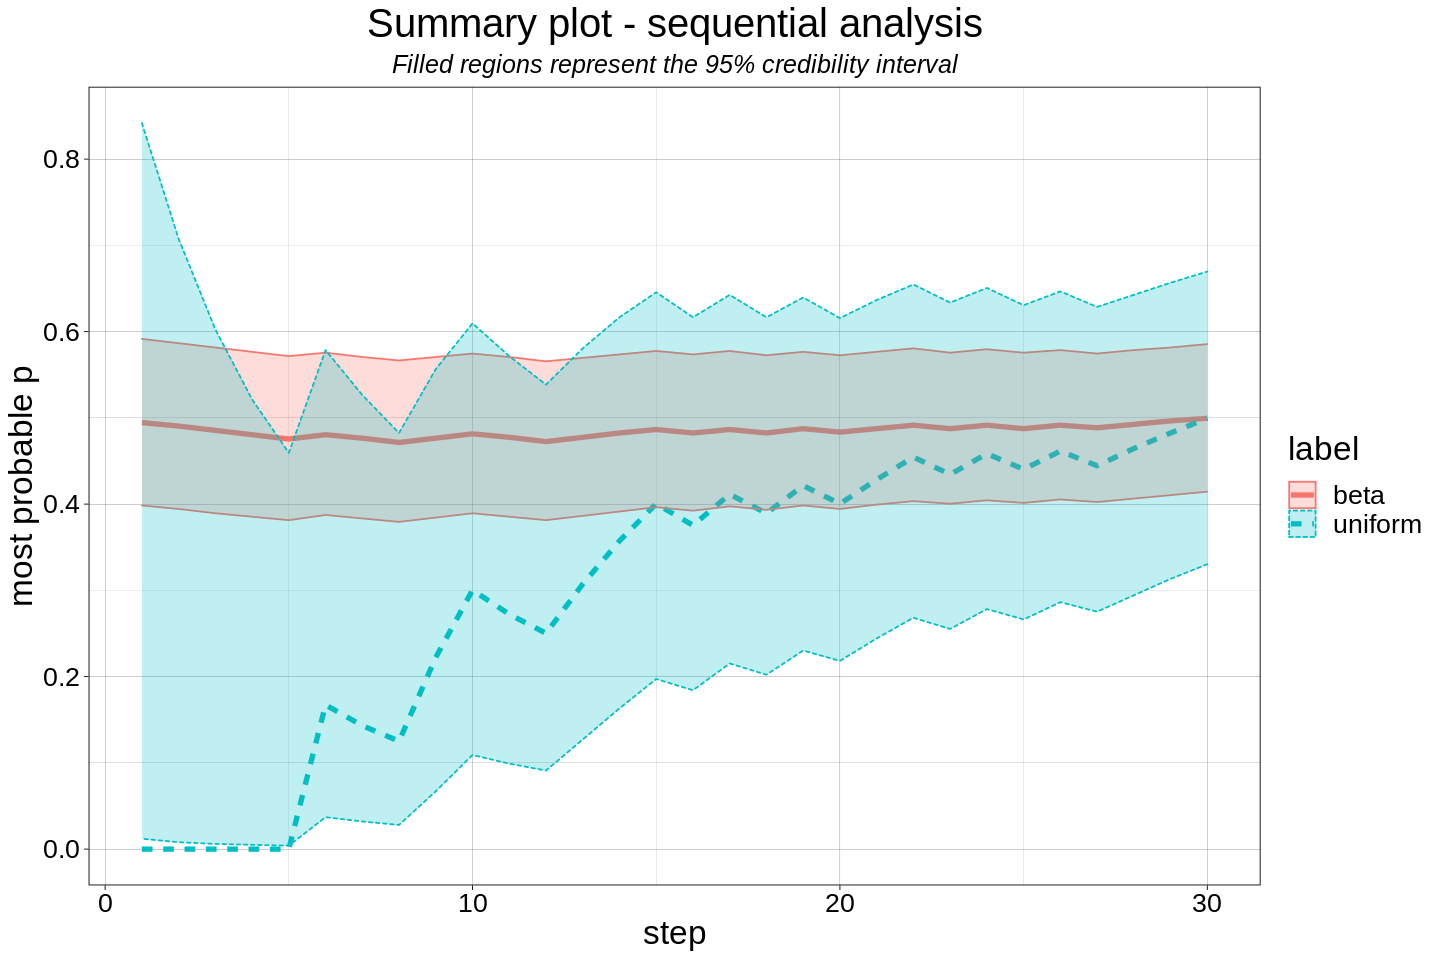

In [370]:
plot <- ggplot(data=df, aes(x=x, y=y, ymax=y_max,min=y_min, fill=label, linetype=label, color=label)) +   
     theme_linedraw() +                                            
     geom_line(lwd=1.5) +    
     geom_ribbon(alpha=0.25) +                                                        
     theme(text = element_text(size=20)) +
     ggtitle("Summary plot - sequential analysis") +
     labs(subtitle="Filled regions represent the 95% credibility interval") +
     theme(plot.title = element_text(hjust = 0.5), 
           plot.subtitle = element_text(size=15, hjust=0.5, face="italic"))  +
     ylab("most probable p") +
     xlab("step") 

plot

In [365]:
unif_max_p = p[which.max(unif_posterior)]
beta_max_p = p[which.max(beta_posterior)]

cat("Final most probable value for the coin probability p is:\n")
cat("\t", unif_max_p, "with the uniform prior \n")
cat("\t", beta_max_p, "with the beta prior \n")

unif_low  = p[cumsum(unif_posterior/n_points)>0.025][1]
unif_high = p[cumsum(unif_posterior/n_points)>0.975][1]
beta_low  = p[cumsum(beta_posterior/n_points)>0.025][1]
beta_high = p[cumsum(beta_posterior/n_points)>0.975][1]

cat("Final bounds for a 95% credibility interval:\n")
cat("\t low:", unif_low, "high:", unif_high,"with the uniform prior \n")
cat("\t low:", beta_low, "high:", beta_high,"with the beta prior \n")

Final most probable value for the coin probability p is:
	 0.4994995 with the uniform prior 
	 0.4994995 with the beta prior 
Final bounds for a 95% credibility interval:
	 low: 0.3303303 high: 0.6696697 with the uniform prior 
	 low: 0.4144144 high: 0.5855856 with the beta prior 


At the end we obtain the same results as the previous analysis